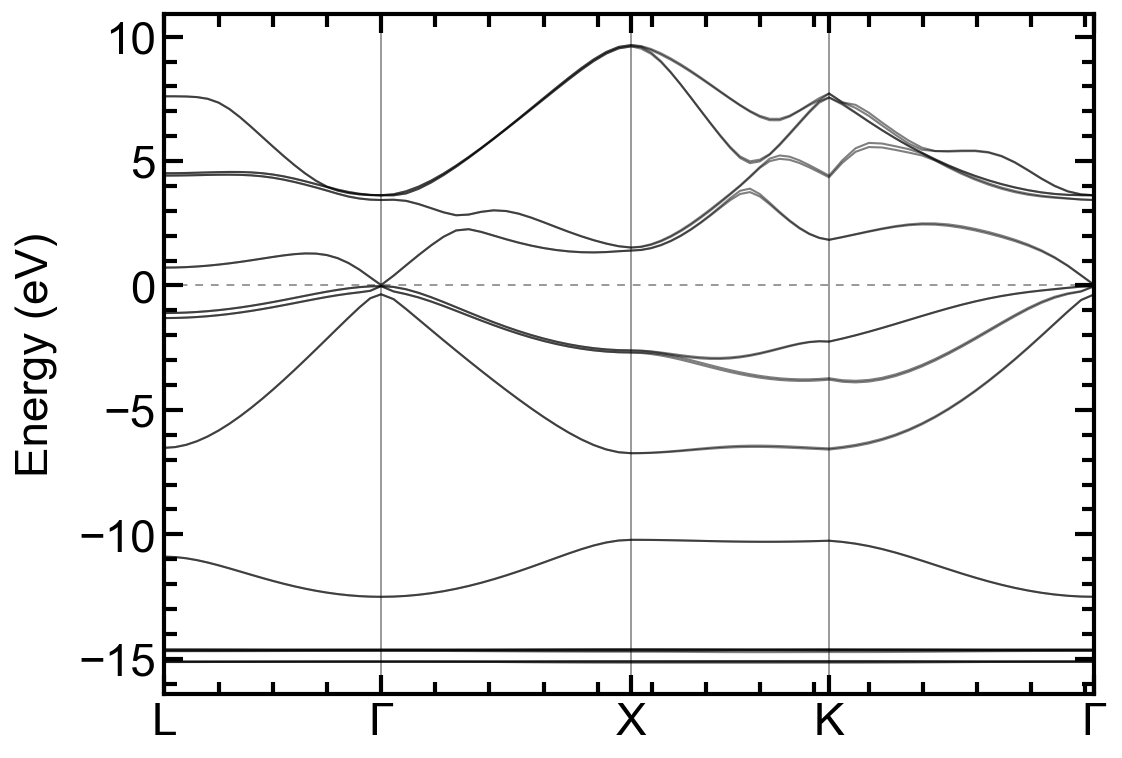

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('sci.mplstyle')

def symmetry_point_k_pos(bands_kp_out_file: str):
    ''' 
    Reads the .bands.kp.out file and searches the k values of the high symmetry points and returns
    
    input: 
        bands_kp_out_file (str): Filename of the post processed output.
                                example: GaAs.bands.kp.out
                                
    returns:
        symmetry_coordinates (list)
        
    
    '''

    # Initialize an empty list to store the x-coordinate values
    symmetry_coordinates = []

    # Open the file and read its contents
    with open(bands_kp_out_file, 'r') as file:
        # Iterate over each line in the file
        for line in file:
            # Check if the line contains the "high-symmetry point" information
            if 'high-symmetry point' in line:
                # Split the line into parts based on whitespace
                parts = line.split()
                # Extract the x-coordinate value (the last part of the line)
                x_coordinate = float(parts[-1])
                # Append the x-coordinate value to the symmetry_coordinates list
                symmetry_coordinates.append(x_coordinate)

    # Print the extracted symmetry coordinates
    #print(symmetry_coordinates)
    
    return symmetry_coordinates

def fermi_energy_finder(scf_out_file: str) -> float:
    """
    Find the Fermi energy value from the SCF output file.

    Parameters:
        scf_out_file (str): File path to the SCF output file.

    Returns:
        float: Fermi energy value.
    """
    fermi_energy = None
    with open(scf_out_file, 'r') as file:
        for line in file:
            if 'highest occupied level' in line:
                fermi_energy = float(line.split()[4])
                break
                
            if 'the Fermi energy is' in line:
                fermi_energy = float(line.split()[4])
                break
    return fermi_energy

def load_bands_data(bands_data_file: str):
    """
    Load bands data from a file.

    Parameters:
        bands_data_file (str): The file path to the bands data.

    Returns:
        tuple: A tuple containing two numpy arrays:
            - k (np.ndarray): Array of unique k-values.
            - bands (np.ndarray): Array of band energies reshaped as (num_bands, num_k_points).
    """
    # Load data
    data = np.loadtxt(bands_data_file)

    k = np.unique(data[:, 0])
    bands = np.reshape(data[:, 1], (-1, len(k)))
    
    return k, bands

def band_structure_plot(bands_kp_out_file: str
                        , bands_data_file: str
                        , labels: list
                        , output_figure_name: str
                        , scf_out_file: str):
    """
    Plot the band structure from bands data and high-symmetry k-points.

    Parameters:
        bands_kp_out_file (str): File path to the file containing high-symmetry k-points.
        bands_data_file (str): File path to the bands data file.
        labels (list): List of labels for high-symmetry k-points.
        output_figure_name (str): Output file name for the figure.
        scf_out_file (str): File path to the SCF output file.

    Returns:
        None
    """

    plt.rcParams["figure.dpi"] = 150
    plt.rcParams["figure.facecolor"] = "white"
    plt.rcParams["figure.figsize"] = (8, 6)

    # Initialize an empty list to store the x-coordinate values
    symmetry_coordinates = symmetry_point_k_pos(bands_kp_out_file)

    k, bands = load_bands_data(bands_data_file)
    
    fermi_energy = fermi_energy_finder(scf_out_file)
    #fermi energy is subtracted from the file to rescale energy in terms of fermi energy.
    for band in range(len(bands)):
        plt.plot(k, bands[band, :] - fermi_energy, linewidth=1, alpha=0.5, color='k')
    plt.xlim(min(k), max(k))
    #plt.ylim(-0.3,0.3)

    # Plot vertical lines for high-symmetry k-points
    for point in symmetry_coordinates:
        plt.axvline(point, linewidth=0.75, color='k', alpha=0.5)

    # Text labels
    plt.xticks(ticks=symmetry_coordinates, labels=labels)
    plt.ylabel("Energy (eV)")
    
    # Fermi energy horizontal line
    plt.axhline(fermi_energy - fermi_energy, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
    
#    # Adding text at Fermi level line
#    text_x_position = min(k) + 0.05 * (max(k) - min(k))  # Adjust 0.02 to change the position of the text
#
#    plt.text(text_x_position, fermi_energy, '$E_f$', ha='left', va='center', fontsize=8)


    plt.savefig(f'{output_figure_name}.pdf')
    plt.show()
    
labels=['L', '$\Gamma$', 'X', 'K', '$\Gamma$']
output_figure_name = 'GaAs_bandstructure'
fermi_energy = 0.1
# Define the file path
bands_kp_out_file = 'bands.kp.out'
bands_data_file = 'bands.dat.gnu'
scf_out_file = 'scf.out'

band_structure_plot(bands_kp_out_file
                        , bands_data_file
                        , labels
                        , output_figure_name
                        , scf_out_file)